In [1]:
import numpy as np
import csv
def convert(d):
    try:
        return float(d)
    except:
        return d

def movingaverage(data, window_size):
    data2 = np.concatenate([data,data,data])
    cumsum_vec = np.cumsum(np.insert(data2, 0, 0)) 
    return ((cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size     )[len(data)-int((window_size+0.5)/2):(2*len(data)-int((window_size+0.5)/2))]

reader = csv.DictReader(open('data\\demand_series_Shaner_unnormalized.csv'),delimiter=',')

csv_dict = {}
nrows = 0
for row in reader:
    nrows+=1
    for key in row.keys():
        try: 
            csv_dict[key].append(convert(row[key]))
        except:
            csv_dict[key] = [convert(row[key])]


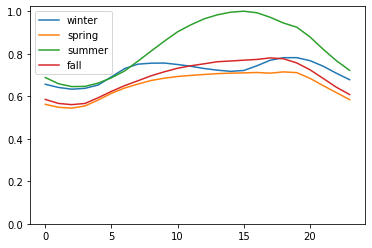

In [2]:
winter = np.zeros(24)
spring = np.zeros(24)
summer = np.zeros(24)
fall = np.zeros(24)


reader = csv.DictReader(open('data\\demand_series_Shaner_unnormalized.csv').readlines()[5:],delimiter=',')

for row in reader:
    month = int(row['month'])
    hour = (int(row['hour'])-8)%24
    year = int(row['year'])
    if month == 12:
        year += 1
    if year > 2000:
        if month in [12,1,2]:
            winter[hour] += float(row['demand'])
        elif month in [3,4,5]:
            spring[hour] += float(row['demand'])
        elif month in [6,7,8]:
            summer[hour] += float(row['demand'])
        elif month in [9,10,11]:
            fall[hour] += float(row['demand']                )

import matplotlib.pyplot as plt

max_demand = np.max(summer)
plt.plot(winter/max_demand,label='winter')
plt.plot(spring/max_demand,label='spring')
plt.plot(summer/max_demand,label='summer')
plt.plot(fall/max_demand,label='fall')

plt.legend()
plt.ylim(bottom=0.0)

seasonal = [winter/max_demand,spring/max_demand,summer/max_demand,fall/max_demand]


11


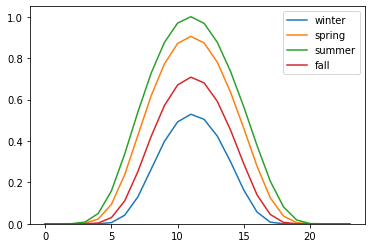

In [3]:
winter = np.zeros(24)
spring = np.zeros(24)
summer = np.zeros(24)
fall = np.zeros(24)


reader = csv.DictReader(open('data\\solar_series_Shaner_unnormalized.csv').readlines()[5:],delimiter=',')

for row in reader:
    month = int(row['month'])
    hour = (int(row['hour'])-8)%24
    year = int(row['year'])
    if month == 12:
        year += 1
    if year > 2000:
        if month in [12,1,2]:
            winter[hour] += float(row['solar capacity'])
        elif month in [3,4,5]:
            spring[hour] += float(row['solar capacity'])
        elif month in [6,7,8]:
            summer[hour] += float(row['solar capacity'])
        elif month in [9,10,11]:
            fall[hour] += float(row['solar capacity']                )

import matplotlib.pyplot as plt

max_solar = np.max(summer)
plt.plot(winter/max_solar,label='winter')
plt.plot(spring/max_solar,label='spring')
plt.plot(summer/max_solar,label='summer')
plt.plot(fall/max_solar,label='fall')

plt.legend()
plt.ylim(bottom=0.0)
print(np.argmax(summer))

seasonal_solar = [winter/max_solar,spring/max_solar,summer/max_solar,fall/max_solar]

20


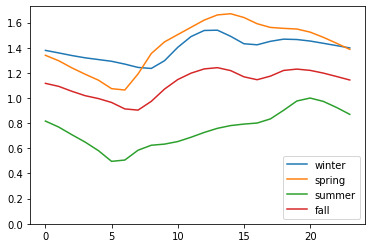

In [4]:
winter = np.zeros(24)
spring = np.zeros(24)
summer = np.zeros(24)
fall = np.zeros(24)


reader = csv.DictReader(open('data\\wind_series_Shaner_unnormalized.csv').readlines()[5:],delimiter=',')

for row in reader:
    month = int(row['month'])
    hour = (int(row['hour'])-8)%24
    year = int(row['year'])
    if month == 12:
        year += 1
    if year > 2000:
        if month in [12,1,2]:
            winter[hour] += float(row['wind capacity'])
        elif month in [3,4,5]:
            spring[hour] += float(row['wind capacity'])
        elif month in [6,7,8]:
            summer[hour] += float(row['wind capacity'])
        elif month in [9,10,11]:
            fall[hour] += float(row['wind capacity']                )

import matplotlib.pyplot as plt

max_wind = np.max(summer)
plt.plot(winter/max_wind,label='winter')
plt.plot(spring/max_wind,label='spring')
plt.plot(summer/max_wind,label='summer')
plt.plot(fall/max_wind,label='fall')

plt.legend()
plt.ylim(bottom=0.0)
print(np.argmax(summer))

seasonal_wind = [winter/max_wind,spring/max_wind,summer/max_wind,fall/max_wind]

10
24
0.20529232402949849 0.7947076759705016


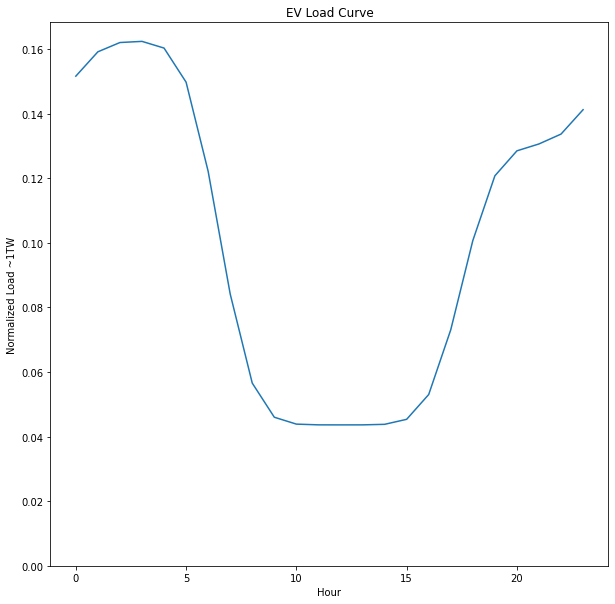

In [5]:


ev_load_day0 = np.zeros(24)
ev_load_day0[8:18] = 1.0
n_day_hours = int(np.sum(np.where(ev_load_day0 > 0.0,1,0)))
ev_load_night = np.zeros(24-n_day_hours)

ev_load_night[0:8] = 1.25
ev_load_night[8:] = 1.0
print(n_day_hours)

day_frac = 0.2
night_frac = 0.8
ev_frac = 0.1

def get_ev_load(ev_load_night0):
    ev_load_day = np.zeros(24)
    ev_load_day[7:18] = 1.0
    n_day_hours = int(np.sum(np.where(ev_load_day > 0.0,1,0)))
    ev_load_night = np.concatenate([ev_load_night0[0:7],np.zeros(n_day_hours),ev_load_night0[8:]])

    # plt.plot(ev_load_night)
    # plt.plot(ev_load_day)
    def gauss(x,u,std):
        return 1.0/np.sqrt(2*np.pi*std**2) * np.exp(-np.power(x-u,2.0)/(2*std**2))

    def normalize(xs):
        hours = np.array(range(72))
        # hours = np.concatenate([hours,hours,hours])
        res = np.zeros(72)
        for i in range(72):
            res += gauss(hours,i,1.25)*xs[i%24]
        return res[24:48]
            
    
    ev_load_day = normalize(ev_load_day)
    ev_load_night = normalize(ev_load_night)
    ev_load_tot = np.sum(ev_load_night)+np.sum(ev_load_day)
    ev_load_day = ev_load_day*day_frac/np.sum(ev_load_day)
    ev_load_night = ev_load_night*night_frac/np.sum(ev_load_night)
    # print(np.sum(ev_load_day),np.sum(ev_load_night))
    ev_load = (ev_load_day+ev_load_night)
    sum_load = np.sum(ev_load)
    ev_load = ev_load/sum_load
    return ev_load





# print(np.sum(ev_load)/sum_load,np.sum(ev_load_day)/sum_load,np.sum(ev_load_night)/sum_load)


# ev_load_smoothed = movingaverage(ev_load,3)
# print(ev_load_smoothed)
# plt.plot(ev_load)
# plt.plot(ev_load_smoothed)

ev_load = get_ev_load(ev_load_night)
print(len(ev_load))
fig = plt.figure(figsize=(10,10))

day_ev_load = np.where(ev_load_day0 > 0.0,1.0,0.0)*ev_load
night_ev_load = np.where(ev_load_day0 > 0.0,0.0,1.0)*ev_load
print(np.sum(day_ev_load),np.sum(night_ev_load))

ev_load_smoothed = ev_load*ev_frac*24.0
plt.plot(ev_load_smoothed)
plt.ylim(bottom=0.0)
plt.ylabel('Normalized Load ~1TW')
plt.xlabel('Hour')
plt.title('EV Load Curve')
seasonal_ev = []
seasonal_ev0 = []
for season in seasonal:
    seasonal_ev.append( season+ev_load_smoothed)
    seasonal_ev0.append( season+ev_load_smoothed)
    
plt.savefig('figures\\ev_curve.png',facecolor='White')




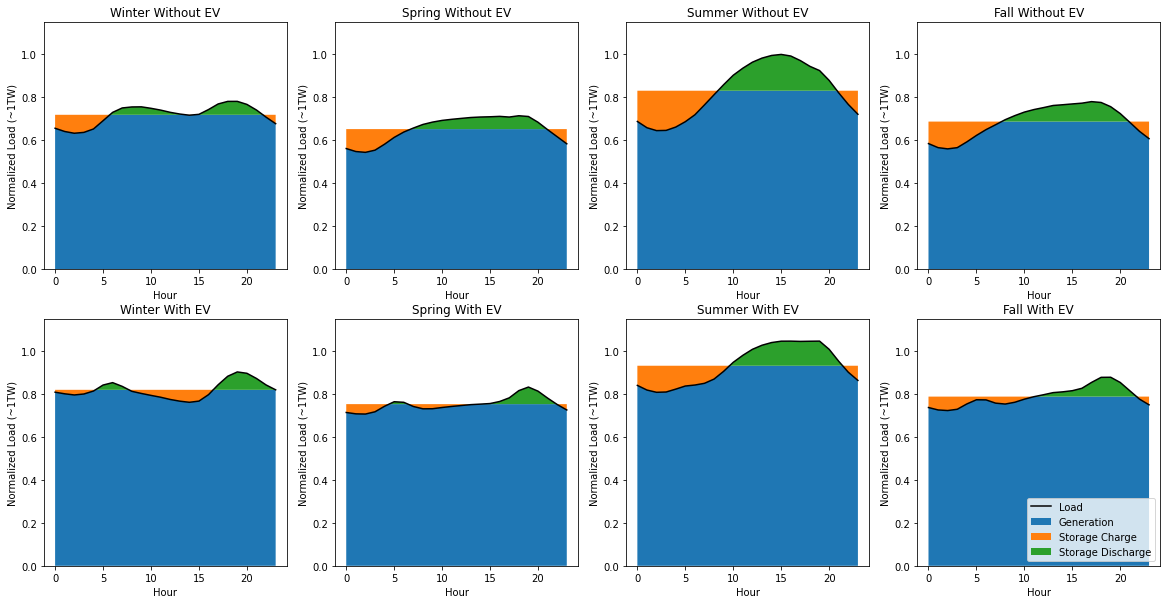

In [6]:
import scipy.interpolate as intrp
def plot_storage(load0,generation0,top=1.15):
    t0 = np.linspace(0,23,24)
    gen_intrp = intrp.interp1d(t0,generation0)
    load_intrp = intrp.interp1d(t0,load0)
    t = np.linspace(0,23,101)
    load = load_intrp(t)
    generation = gen_intrp(t)
    diff = load - generation 
    charge = np.where(generation >= load, diff,0.0)
    discharge = np.where(load >= generation ,diff,0.0)
    plt.stackplot(t,generation+charge,-charge,discharge,labels=['Generation','Storage Charge','Storage Discharge'])
    plt.ylim(bottom=0.0,top=top)
    plt.xlabel('Hour')
    plt.ylabel('Normalized Load (~1TW)')

fig = plt.figure(figsize=(20,10))


seasons = ['Winter','Spring','Summer','Fall']

for i in range(len(seasonal)):
    fig.add_subplot(2,4,i+1)
    plt.title(seasons[i] + ' Without EV')
    plot_storage(seasonal[i],np.mean(seasonal[i])*np.ones(24))
    plt.plot(seasonal[i],color='Black',label='Load')
 

for i in range(len(seasonal)):
    fig.add_subplot(2,4,i+5)
    plt.title(seasons[i] + ' With EV')
    plot_storage(seasonal_ev[i],np.mean(seasonal_ev[i])*np.ones(24))   
    plt.plot(seasonal_ev[i],color='Black',label='Load')
    
plt.legend(loc='lower right')

plt.savefig('figures\\AddingEv',facecolor='White')

In [7]:
def get_req_storage(ev_load_night0,load0,generation0):

    ev_load = get_ev_load(ev_load_night0)
    ev_load_smoothed = ev_load*ev_frac*24.0

    load = load0+ev_load_smoothed
    generation = generation0*np.mean(load)/np.mean(generation0)

    t0 = np.linspace(0,23,24)
    gen_intrp = intrp.interp1d(t0,generation)
    load_intrp = intrp.interp1d(t0,load)
    t = np.linspace(0,23,101)
    load = load_intrp(t)
    generation = gen_intrp(t)
    diff = load - generation 
    charge = np.where(generation >= load, diff,0.0)
    return np.sqrt(np.sum(diff*diff))

import scipy.optimize as opt

def get_ev_curves(seasonal_load,seasonal_generation):
    n_day_hours = int(np.sum(np.where(ev_load_day0 > 0.0,1,0)))
    ev_load_night = np.zeros(24-n_day_hours)

    ev_load_night[0:8] = 1.25
    ev_load_night[8:] = 1.0

    ev_loads_season = []
    seasonal_ev = []
    for i in range(len(seasons)):
        load = seasonal_load[i]
        generation = seasonal_generation[i]
        res = opt.minimize(get_req_storage,ev_load_night,args=(load,generation),bounds=opt.Bounds(0.0,np.inf))
        ev_load_a = get_ev_load(res.x)
        ev_load = get_ev_load(res.x)*ev_frac*24
        ev_loads_season.append(ev_load)
        seasonal_ev.append(load+ev_load)
        day_ev_load = np.where(ev_load_day0 > 0.0,1.0,0.0)*ev_load_a
        night_ev_load = np.where(ev_load_day0 > 0.0,0.0,1.0)*ev_load_a
        print(np.sum(day_ev_load),np.sum(night_ev_load))
    return ev_loads_season, seasonal_ev
    # plt.figure()
    # plt.plot(ev_load)

generation_baseload = []
generation_solar = []
for i in range(len(seasons)):
    generation_baseload.append(np.mean(seasonal[i])*np.ones(24))
    generation_solar.append(seasonal_solar[i]*np.sum(seasonal[i])/np.sum(seasonal_solar[i]))


ev_loads_season, seasonal_ev = get_ev_curves(seasonal,generation_baseload) 


0.2067852787217756 0.7932147212782246
0.194076941413984 0.805923058586016
0.18657352885751552 0.8134264711424846
0.18643192025508615 0.8135680797449139


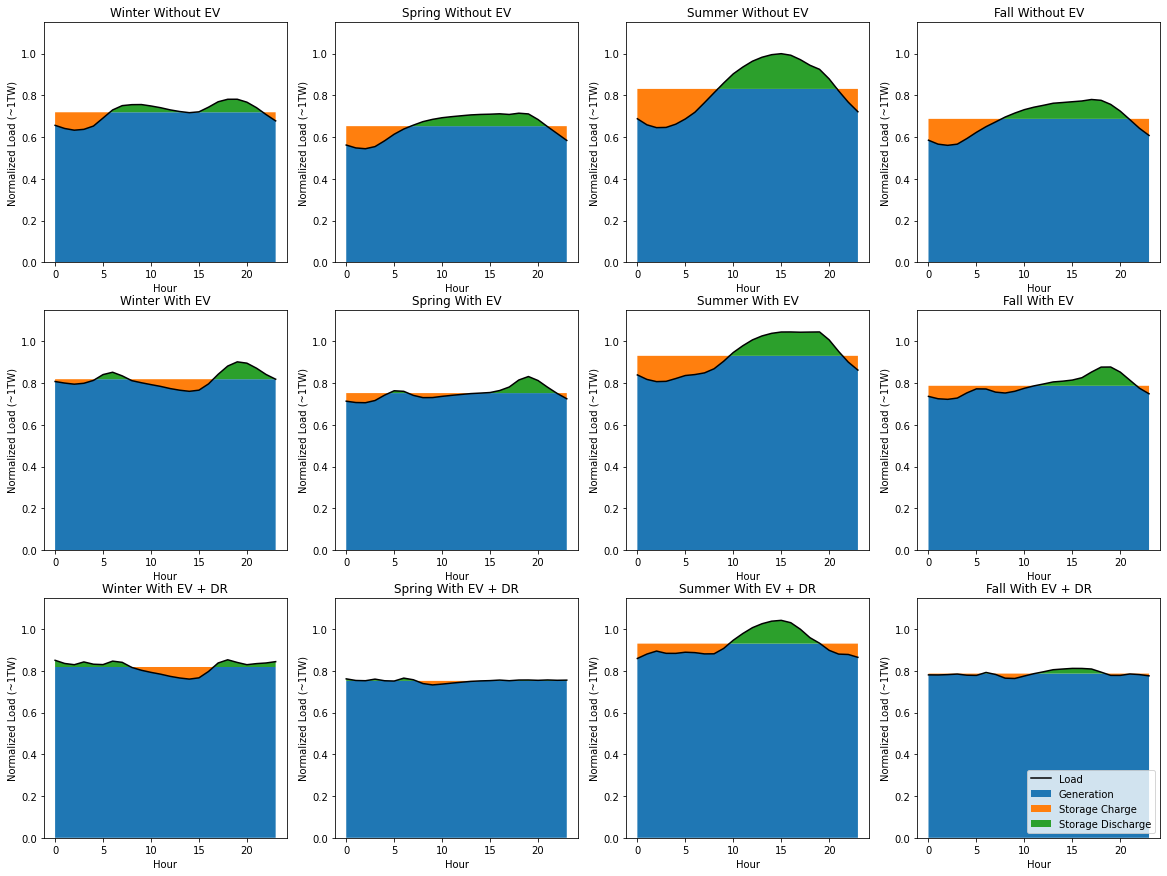

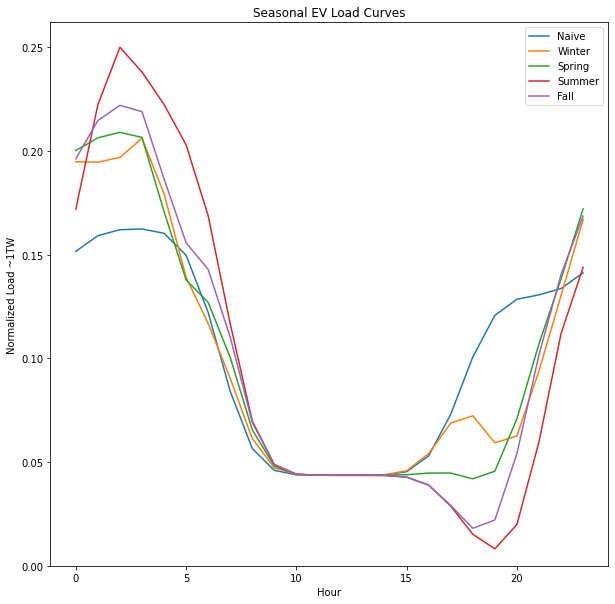

In [8]:

fig = plt.figure(figsize=(20,15))


seasons = ['Winter','Spring','Summer','Fall']

for i in range(len(seasonal)):
    fig.add_subplot(3,4,i+1)
    plt.title(seasons[i] + ' Without EV')
    plot_storage(seasonal[i],np.mean(seasonal[i])*np.ones(24))
    plt.plot(seasonal[i],color='Black',label='Load')
 
for i in range(len(seasonal)):
    fig.add_subplot(3,4,i+5)
    plt.title(seasons[i] + ' With EV')
    plot_storage(seasonal_ev0[i],np.mean(seasonal_ev0[i])*np.ones(24))   
    plt.plot(seasonal_ev0[i],color='Black',label='Load')

for i in range(len(seasonal)):
    fig.add_subplot(3,4,i+9)
    plt.title(seasons[i] + ' With EV + DR')
    plot_storage(seasonal_ev[i],np.mean(seasonal_ev[i])*np.ones(24))   
    plt.plot(seasonal_ev[i],color='Black',label='Load')
    
plt.legend(loc='lower right')

plt.savefig('figures\\AddingEv_with_dr',facecolor='White')

plt.figure(figsize=(10,10))
plt.plot(ev_load_smoothed,label='Naive')
for i in range(len(seasonal)):
    plt.plot(ev_loads_season[i],label=seasons[i])
plt.legend()
plt.ylim(bottom=0.0)
plt.ylabel('Normalized Load ~1TW')
plt.xlabel('Hour')
plt.title('Seasonal EV Load Curves')
plt.savefig('figures\\Seasonal_EV_Loads.png',facecolor='White')

0.24084316576054968 0.7591568342394505
0.25781057929088474 0.7421894207091153
0.2578105792908848 0.7421894207091152
0.256061658238129 0.7439383417618709


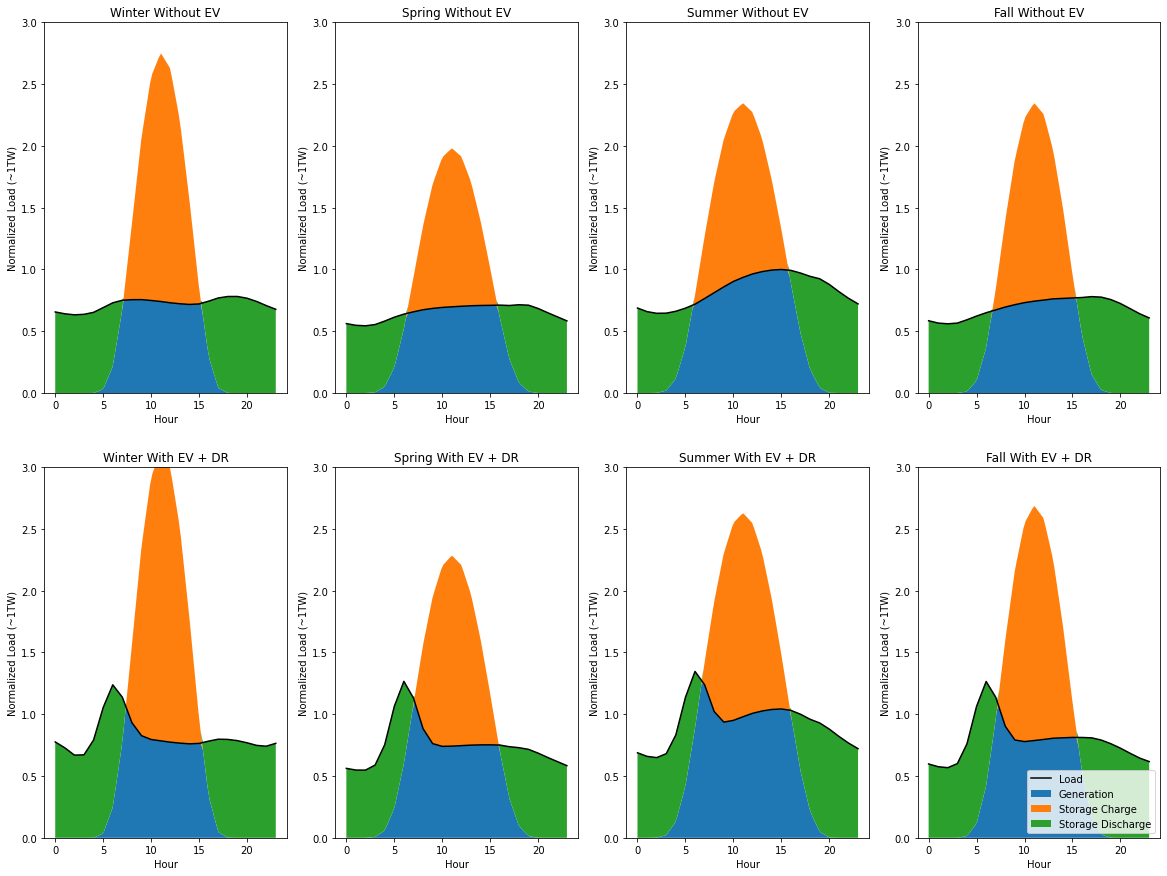

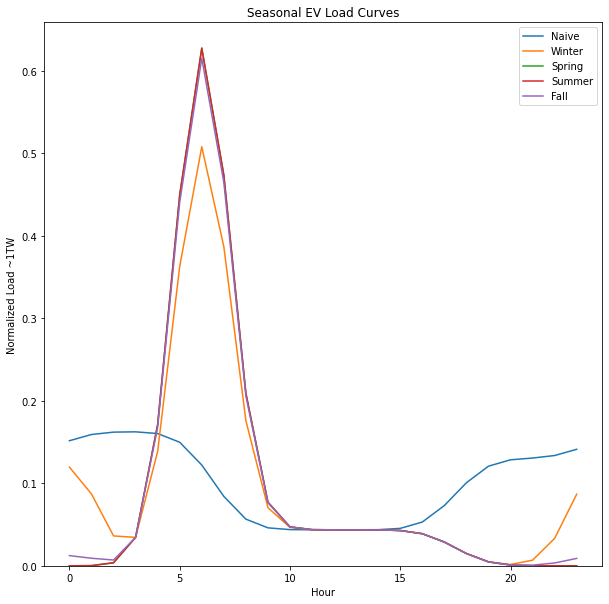

In [9]:
generation_solar = []
for i in range(len(seasons)):
    generation_solar.append(seasonal_solar[i]*np.sum(seasonal[i])/np.sum(seasonal_solar[i]))
ev_loads_season_solar, seasonal_ev_solar = get_ev_curves(seasonal,generation_solar) 

fig = plt.figure(figsize=(20,15))


seasons = ['Winter','Spring','Summer','Fall']

for i in range(len(seasonal)):
    fig.add_subplot(2,4,i+1)
    plt.title(seasons[i] + ' Without EV')
    plot_storage(seasonal[i],generation_solar[i],top=3.0)
    plt.plot(seasonal[i],color='Black',label='Load')
 


for i in range(len(seasonal)):
    fig.add_subplot(2,4,i+5)
    plt.title(seasons[i] + ' With EV + DR')
    plot_storage(seasonal_ev_solar[i],generation_solar[i]*np.sum(seasonal_ev_solar[i])/np.sum(seasonal[i]),top=3.0)   
    plt.plot(seasonal_ev_solar[i],color='Black',label='Load')
    
plt.legend(loc='lower right')

plt.savefig('figures\\AddingEv_with_dr',facecolor='White')

plt.figure(figsize=(10,10))
plt.plot(ev_load_smoothed,label='Naive')
for i in range(len(seasonal)):
    plt.plot(ev_loads_season_solar[i],label=seasons[i])
plt.legend()
plt.ylim(bottom=0.0)
plt.ylabel('Normalized Load ~1TW')
plt.xlabel('Hour')
plt.title('Seasonal EV Load Curves')
plt.savefig('figures\\Seasonal_EV_Loads.png',facecolor='White')

0.2218977915071887 0.7781022084928113
0.24539140402071064 0.7546085959792893
0.1763913852478607 0.8236086147521394
0.19023566993828675 0.8097643300617131


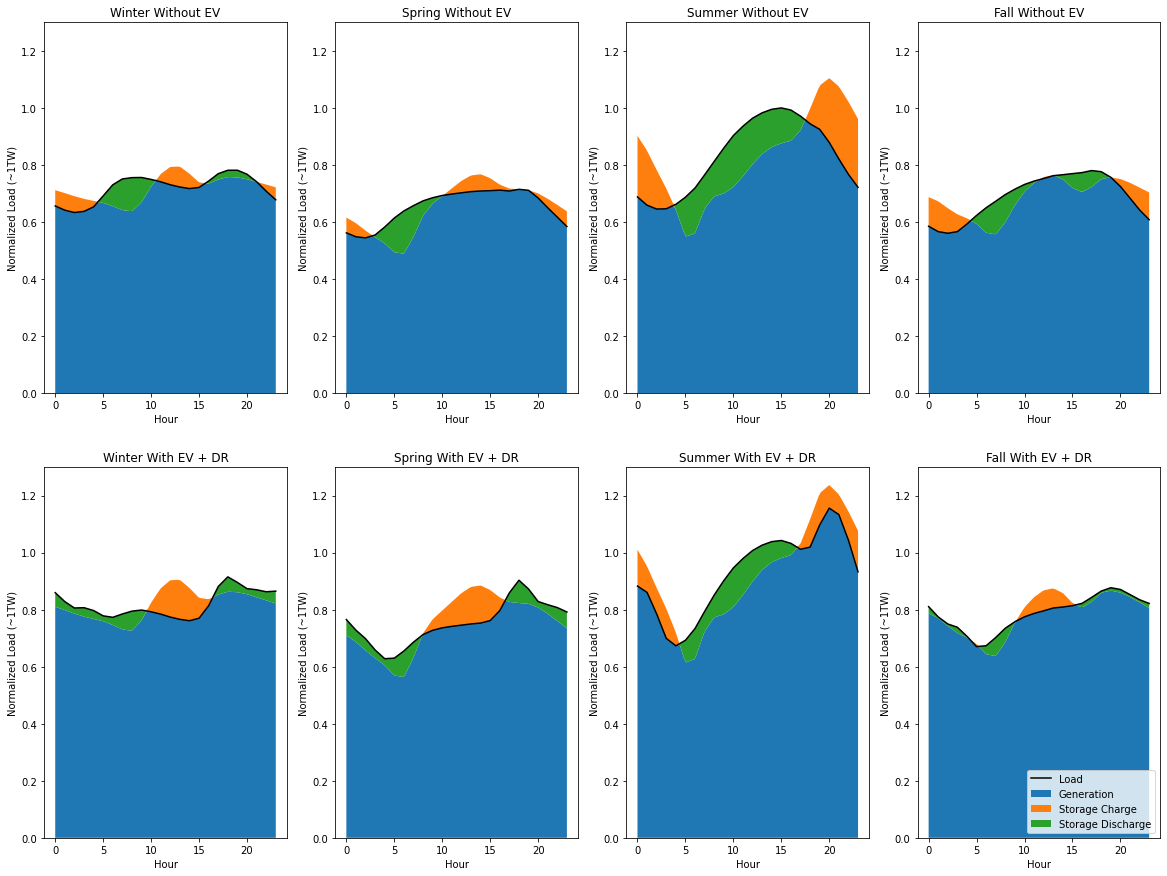

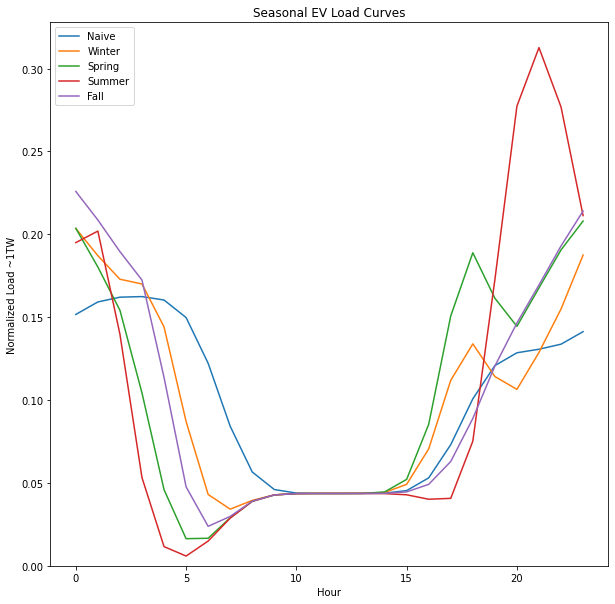

In [10]:
generation_wind = []
for i in range(len(seasons)):
    generation_wind.append(seasonal_wind[i]*np.sum(seasonal[i])/np.sum(seasonal_wind[i]))
ev_loads_season_wind, seasonal_ev_wind = get_ev_curves(seasonal,generation_wind) 

fig = plt.figure(figsize=(20,15))


seasons = ['Winter','Spring','Summer','Fall']

for i in range(len(seasonal)):
    fig.add_subplot(2,4,i+1)
    plt.title(seasons[i] + ' Without EV')
    plot_storage(seasonal[i],generation_wind[i],top=1.3)
    plt.plot(seasonal[i],color='Black',label='Load')
 


for i in range(len(seasonal)):
    fig.add_subplot(2,4,i+5)
    plt.title(seasons[i] + ' With EV + DR')
    plot_storage(seasonal_ev_wind[i],generation_wind[i]*np.sum(seasonal_ev_wind[i])/np.sum(seasonal[i]),top=1.3)   
    plt.plot(seasonal_ev_wind[i],color='Black',label='Load')
    
plt.legend(loc='lower right')

plt.savefig('figures\\AddingEv_with_dr',facecolor='White')

plt.figure(figsize=(10,10))
plt.plot(ev_load_smoothed,label='Naive')
for i in range(len(seasonal)):
    plt.plot(ev_loads_season_wind[i],label=seasons[i])
plt.legend()
plt.ylim(bottom=0.0)
plt.ylabel('Normalized Load ~1TW')
plt.xlabel('Hour')
plt.title('Seasonal EV Load Curves')
plt.savefig('figures\\Seasonal_EV_Loads.png',facecolor='White')

0.2218766287320917 0.7781233712679085
0.24520835484387365 0.7547916451561263
0.1762940052327221 0.8237059947672779
0.19353076180109313 0.8064692381989069


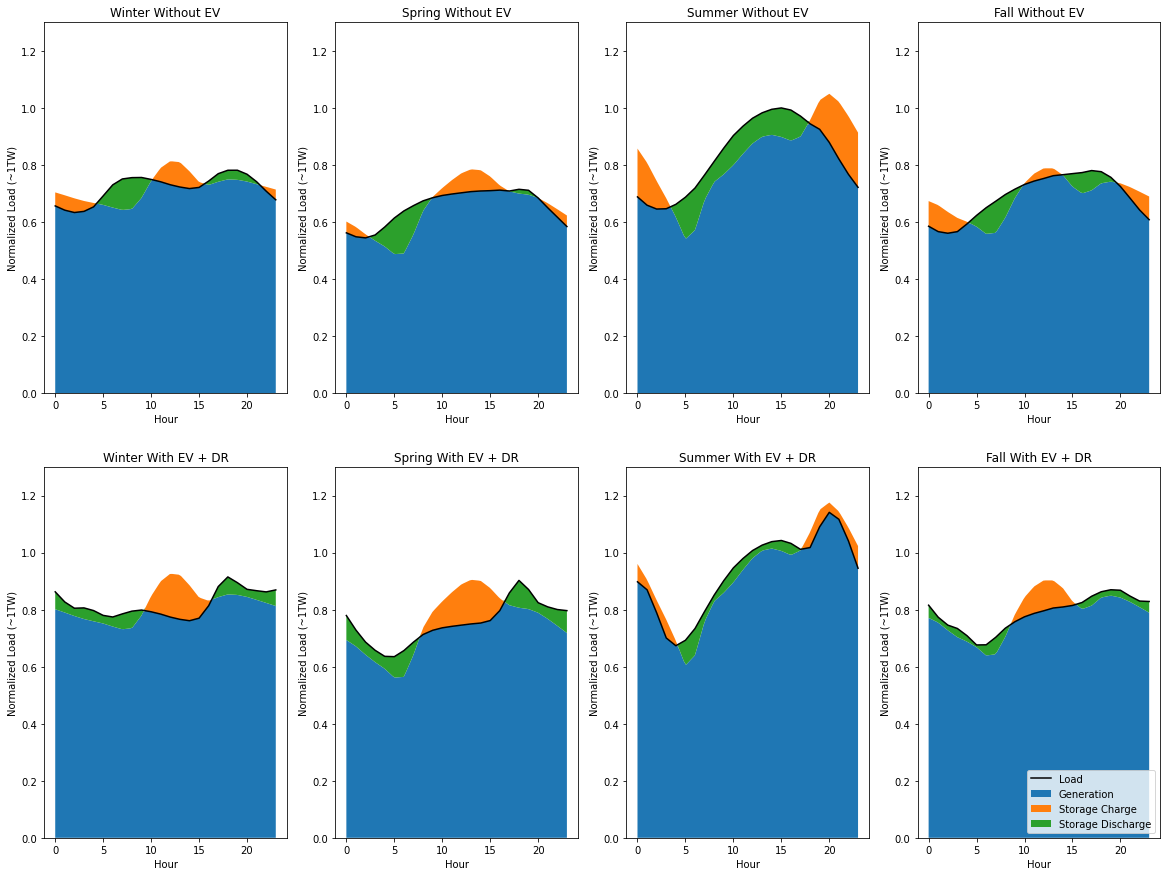

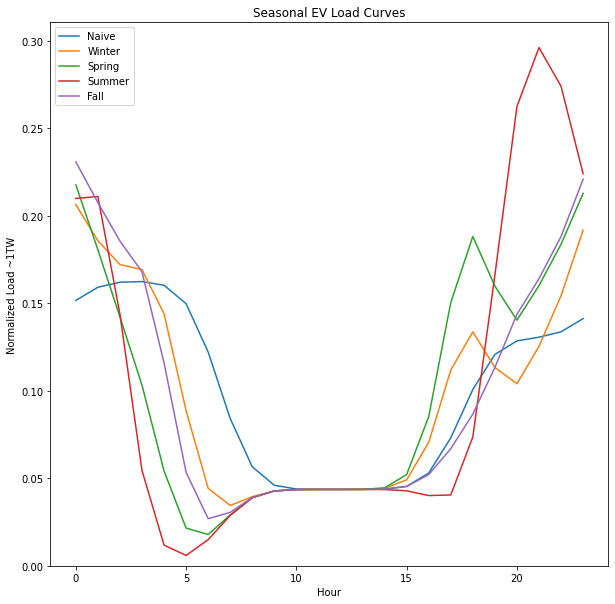

In [11]:
generation_ws = []
for i in range(len(seasons)):
    ws = 0.9*seasonal_wind[i] + 0.1*seasonal_solar[i]
    generation_ws.append(ws*np.sum(seasonal[i])/np.sum(ws))
ev_loads_season_ws, seasonal_ev_ws = get_ev_curves(seasonal,generation_ws) 

fig = plt.figure(figsize=(20,15))


seasons = ['Winter','Spring','Summer','Fall']

for i in range(len(seasonal)):
    fig.add_subplot(2,4,i+1)
    plt.title(seasons[i] + ' Without EV')
    plot_storage(seasonal[i],generation_ws[i],top=1.3)
    plt.plot(seasonal[i],color='Black',label='Load')
 


for i in range(len(seasonal)):
    fig.add_subplot(2,4,i+5)
    plt.title(seasons[i] + ' With EV + DR')
    plot_storage(seasonal_ev_ws[i],generation_ws[i]*np.sum(seasonal_ev_ws[i])/np.sum(seasonal[i]),top=1.3)   
    plt.plot(seasonal_ev_ws[i],color='Black',label='Load')
    
plt.legend(loc='lower right')

plt.savefig('figures\\AddingEv_with_dr',facecolor='White')

plt.figure(figsize=(10,10))
plt.plot(ev_load_smoothed,label='Naive')
for i in range(len(seasonal)):
    plt.plot(ev_loads_season_ws[i],label=seasons[i])
plt.legend()
plt.ylim(bottom=0.0)
plt.ylabel('Normalized Load ~1TW')
plt.xlabel('Hour')
plt.title('Seasonal EV Load Curves')
plt.savefig('figures\\Seasonal_EV_Loads.png',facecolor='White')

(0.0, 1.0582478467095786)

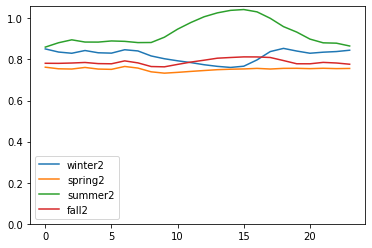

In [12]:
plt.plot(seasonal_ev[0],label='winter2')
plt.plot(seasonal_ev[1],label='spring2')
plt.plot(seasonal_ev[2],label='summer2')
plt.plot(seasonal_ev[3],label='fall2')


plt.legend()
plt.ylim(bottom=0.0)

12.458629012635871
10.302169612542126
16.96202772000552
11.47946555583722


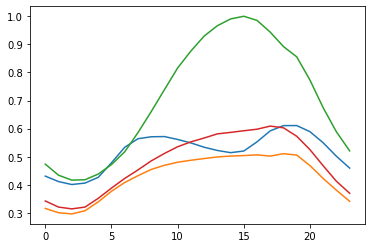

In [13]:

for i in range(len(seasonal)):
    plt.plot(np.power(seasonal[i]-np.mean(summer/max_demand),2.0))
    print(np.sum(np.power(seasonal[i]-np.mean(summer/max_demand),2.0)))

0.3219104846603401
0.767289011663292
0.08995476484262527
0.4997936372474092


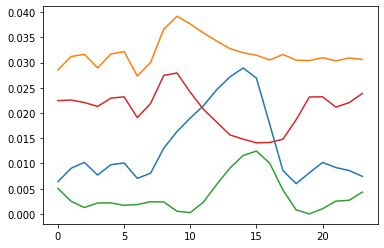

In [14]:

for i in range(len(seasonal_ev)):
    plt.plot(np.power(seasonal_ev[i]-np.mean(seasonal_ev[2]),2.0))
    print(np.sum(np.power(seasonal_ev[i]-np.mean(seasonal_ev[2]),2.0)))